In [1]:
# Imports packages required.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from selenium import webdriver
from bs4 import BeautifulSoup
import lxml
from requests_html import HTMLSession
from datetime import datetime
from dateutil.parser import parse

In [2]:
# Import CSV values from umpire data and game data.
dat = pd.read_csv('CSVData/Duke Game 1 1st Base Dugout.csv')
Umps = pd.read_csv('CSVData/Umpires.csv')

In [3]:
# Show the amount of games by umpire that we have data on.
d = dict.fromkeys(set(Umps['Home Plate Umpire']), 0)
for ump in Umps['Home Plate Umpire']:
    d[ump] += 1
sorted(d.items(), key=lambda x: x[1], reverse=True)

[('Ed Clark', 2),
 ('Brad Tittrington', 2),
 ('Tim Kasate', 2),
 ('Bob Thomas', 2),
 ('Alex Leap', 2),
 ('Laura Nesteriak', 1),
 ('Jeff Blanken', 1),
 ('Jim Cooper', 1),
 ('Aaron Jansen', 1),
 ('Jill Poole', 1),
 ('Robbie Guest', 1),
 ('Ted Broyles', 1),
 ('Brian Sonak', 1),
 ('Eddie Hall', 1),
 ('Joe Alfonse', 1),
 ('Chris Tehonica', 1),
 ('Liz Hammerschmidt', 1),
 ('John Kerwin', 1),
 ('Carlos Guzman', 1),
 ('Chris Nabors', 1),
 ('Matt Dunbar', 1),
 ('Mark Thompson', 1),
 ('Matt Leisure', 1),
 ('Jon Chambers', 1),
 ('Anthony Small', 1),
 ('Donald Pernell', 1),
 ('Ruben Gould', 1)]

In [4]:
# Show names of columns in csv file.
dat.columns

Index(['Name', 'Position', 'Duration', '1. Baserunning Situation', '1. Date',
       '1. Pitchers Name', '1. Pitchers Side', '2. Hitters Name',
       '2. Hitters Side', '3. Pitch Type', '4. Pitch Location',
       '5. Catcher Throw Down', '5. Game Pitch Result', '6. Pitch Count',
       '6. Previous Pitch Count', '8. Hit Location', '8. Hit Results',
       '8. RBI', '9. Outs', 'Hitting Position', 'Period',
       'Team 1. Pitchers Name', 'Team 2. Hitters Name', 'XY Hit Location',
       'XY Pitch Location', 'Z-Game Details'],
      dtype='object')

In [34]:
# Define function to subset a data frame
def subset(df, cols = ['XY Pitch Location', '5. Game Pitch Result']):
    df2 = pd.DataFrame()
    for name in cols:
        df2[name] = df[name]
    return(df2)

In [36]:
woo = subset(dat, cols = ['XY Pitch Location', '5. Game Pitch Result'])

In [39]:
woo.dropna()

,XY Pitch Location,5. Game Pitch Result
0,367;250,Foul
1,123;221,Ball in Play
2,363;267,Foul
3,353;269,Foul
4,146;268,Ball
5,252;256,Ball
6,147;217,Ball in Play
7,345;237,Strike Swinging
8,335;246,Foul
9,161;359,Ball


NameError: name 'woo' is not defined

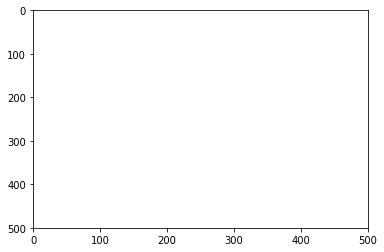

In [8]:
plt.xlim([0, 500])
plt.ylim([500, 0])
plt.scatter(woo['x'], woo['y'])

In [8]:
# Scratch Work

In [38]:
# Remake the dates into a datetime object.
Umps['Date']
for idx, date in enumerate(Umps['Date']):
    Umps['Date'][idx] = datetime.strptime(date, '%m/%d/%Y')

In [41]:
for idx, date in enumerate(Umps['Date']):
    if(date == value):
        print('Success !')

Success !


In [40]:
value = datetime.strptime(dat['1. Date'][0], '%m-%d-%Y')

In [37]:
Umps['Date']

0      4/28/2019
1      4/27/2019
2      4/26/2019
3      4/13/2019
4      4/13/2019
5      4/12/2019
6      4/10/2019
7      4/10/2019
8       4/7/2019
9       4/6/2019
10      4/6/2019
11    03/31/2019
12     3/30/2019
13     3/29/2019
14     4/21/2019
15     3/27/2019
16     3/24/2019
17     3/23/2019
18     3/23/2019
19     3/17/2019
20     3/16/2019
21     3/15/2019
22     3/10/2019
23     3/10/2019
24      3/9/2019
25      3/3/2019
26     4/22/2018
27     4/21/2018
28     4/20/2018
29     4/11/2018
30     3/31/2018
31     3/31/2018
Name: Date, dtype: object